In [72]:
import scipy
import pandas as pd
import numpy as np
import statistics as stat
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import skew, kurtosis
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm
from scipy.optimize import minimize
from scipy import stats

# Problem 1

In [9]:
np.random.seed(1)

#d=np.random.normal(0,1,10)
sk=[]
for i in range(100):
    d=np.random.normal(0,1,10)
    sk.append(skew(d))

d=np.random.normal(0,1,10)
t_stat, p_value=ttest_1samp(sk, popmean=0)
print("skewness p value: {}".format(p_value))
if(p_value<0.05):
    print("skewness function biased")
else:
    print("skewness function unbiased")

kur=[]
for i in range(100):
    d=np.random.normal(0, 1, 10)
    kur.append(kurtosis(d))
d=np.random.normal(0,1,10)
t_stat, p_value=ttest_1samp(kur, popmean=0)
print("kurtosis p value: {}".format(p_value))
if(p_value<0.05):
    print("kurtosis function biased")
else:
    print("kurtosis function unbiased")

skewness p value: 0.3752809359948356
skewness function unbiased
kurtosis p value: 4.501117922614715e-11
kurtosis function biased


# Problem 2

In [146]:
data=pd.read_csv('problem2.csv')
x=data['x'].tolist()
y=data['y'].tolist()

x=sm.add_constant(x)

result=sm.OLS(y,x).fit()
error=result.resid
print(error)
result.summary()

[-0.83848479  0.83529586  1.02742825  1.3197107  -0.1523166  -0.38641696
  1.28474611  0.6785721  -0.23279104  0.68498605  0.90479441  1.03882326
  0.88188173  0.14094188  0.59443017  0.71760455  0.36758746 -0.389435
  4.12403686 -0.05680601  0.66842671 -0.98837595 -1.31557297  0.26537682
  0.41153462  0.7788615  -1.84465372  1.06907408  1.82068861 -0.98639189
 -0.75239421 -1.01950983  0.48915464 -1.6436499  -0.2732364   1.18787117
  0.97341581  0.13851152  0.41529646  1.12914889  0.31369632 -0.78483505
  0.2665901   0.50569968 -1.67738413  0.65902192 -0.25881239 -1.99793919
 -0.64026358  1.52109106 -0.92685988 -1.71158989  0.63461011  0.50398216
 -0.36865304  0.08488123 -1.05294004 -5.08389235 -0.59820773  1.16069069
  1.62901979  0.52427467 -0.04299272  0.57525757 -1.46693675  1.54281348
  0.25996545 -1.27897259  0.30440434 -0.98989937  0.2006473  -1.26898348
  0.68496909 -0.2821325  -1.11770849  0.73021764 -1.20161542  1.26304551
  0.46058222 -0.78173218  3.53168002  1.17877991  1.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           4.34e-06
Time:                        05:06:41   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.325      -0.120       0.360
x1             0.6052      0.124      4.867      0.000       0.358       0.852
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.673
Skew:                          -0.267   Prob(JB):                     3.28e-10
Kurtosis:                       6.193   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

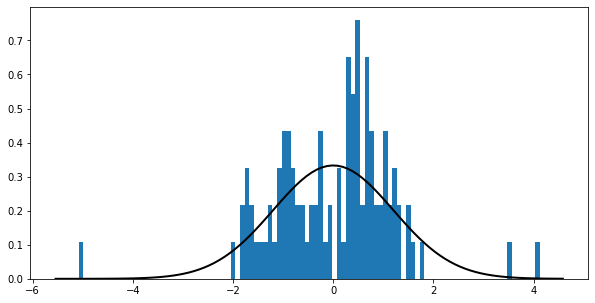

Mean of error: -1.2212453270876722e-17
Variance of error:1.1983941277418964
Skewness of error:-0.26726658552879606
Kurtosis of error:3.1931010009568777


In [106]:
mu, std=norm.fit(error)

plt.hist(error, bins=100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.show()
print("Mean of error: {}".format(error.mean()))
print("Variance of error:{}".format(error.std()))
print("Skewness of error:{}".format(skew(error)))
print("Kurtosis of error:{}".format(kurtosis(error)))

In [140]:
x=data['x']
y=data['y']

In [141]:
 def MLE_Norm(parameters, x, y):
   const, beta, std_dev = parameters
   pred = const + beta*x
   LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
   neg_LL = -1*LL
   return neg_LL

mle_model = minimize(MLE_Norm, np.array([1,1,1]), args=(x, y))
mle_model

      fun: 159.9920966891625
 hess_inv: array([[ 1.42083109e-02, -1.06286391e-04, -6.03001775e-05],
       [-1.06286391e-04,  1.53428108e-02, -3.15255082e-04],
       [-6.03001775e-05, -3.15255082e-04,  7.44927901e-03]])
      jac: array([ 1.90734863e-06,  1.90734863e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.11983619, 0.60520485, 1.19839408])

In [142]:
 def MLE_t(parameters, x, y):
   const, beta, std_dev, p1 = parameters
   pred = const + beta*x
   LL = np.sum(stats.t.logpdf(y-pred, std_dev, p1))
   neg_LL = -1*LL
   return neg_LL

mle_model2 = minimize(MLE_t, np.array([1,1,1,1]), args=(x, y))
mle_model2

      fun: 155.5152872757918
 hess_inv: array([[ 5.03339586e-01,  9.59665830e-04, -1.05271431e-02,
        -4.96660414e-01],
       [ 9.59665830e-04,  1.42926142e-02,  1.64514008e-02,
         9.59665830e-04],
       [-1.05271431e-02,  1.64514008e-02,  8.72953426e+00,
        -1.05271431e-02],
       [-4.96660414e-01,  9.59665830e-04, -1.05271431e-02,
         5.03339586e-01]])
      jac: array([7.62939453e-06, 1.90734863e-06, 3.81469727e-06, 7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 14
     njev: 16
   status: 0
  success: True
        x: array([0.06998071, 0.55893061, 6.75736331, 0.06998071])

In [145]:
def R2(x, y, const, beta):
    error=y-const-beta*x
    ss_total=sum((y-np.mean(y))**2)
    ss_error=sum((error - np.mean(error)) ** 2)
    ss_model=ss_total-ss_error
    return ss_model/ss_total

MLE_N_R2=R2(x, y, mle_model.x[0], mle_model.x[1])
MLE_T_R2=R2(x, y, mle_model2.x[0], mle_model2.x[1])
print("MLE norm R2: {}".format(MLE_N_R2))
print("MLE t R2: {}".format(MLE_T_R2))

MLE norm R2: 0.1946395239189497
MLE t R2: 0.1935016236880568


# Problem 3

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

AR(1)

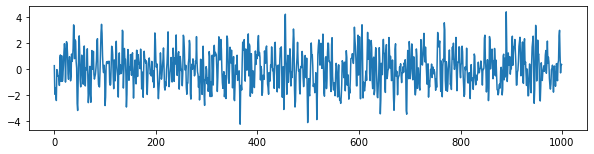

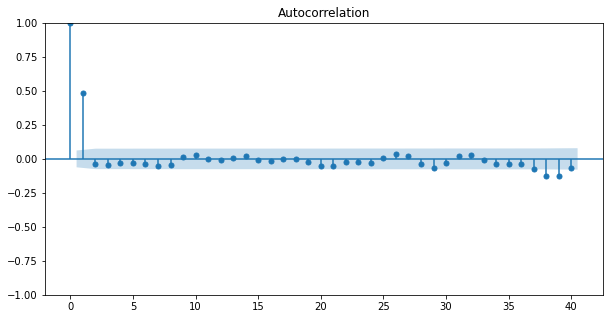

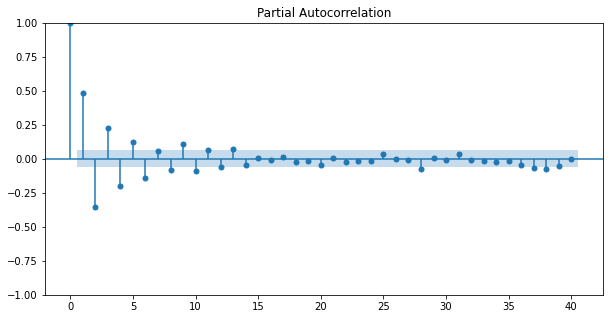

In [147]:
plt.rcParams['figure.figsize'] = (10, 5)
#AR(1)
plt.subplot(2, 1, 1)
ar1 = np.array([1, 0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar1, ma)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plot_acf(simulated_data_1, lags=40)
plt.show()
plot_pacf(simulated_data_1, lags=40, method="ywm")
plt.show()

AR(2)

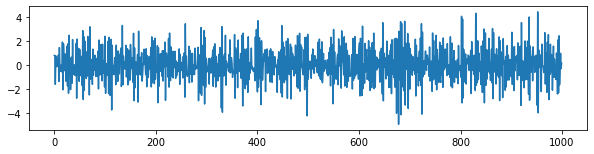

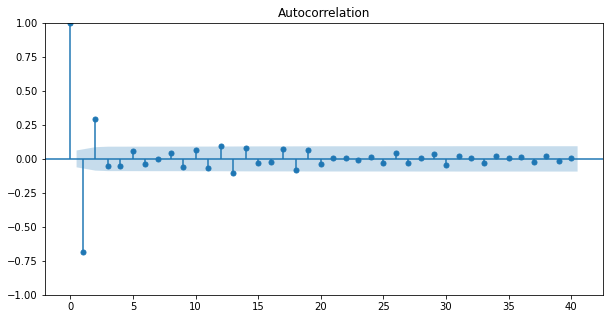

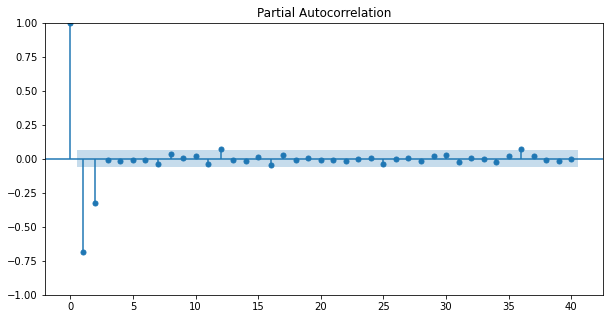

In [52]:
plt.subplot(2, 1, 1)
ar2 = np.array([1, 0.9, 0.3])
ma = np.array([1])
AR_object = ArmaProcess(ar2, ma)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plot_acf(simulated_data_2, lags=40)
plt.show()
plot_pacf(simulated_data_2, lags=40, method="ywm")
plt.show()

AR(3)

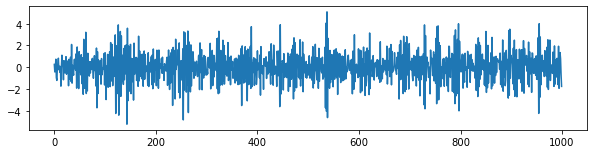

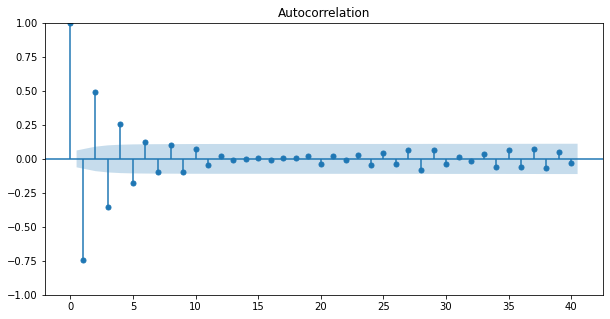

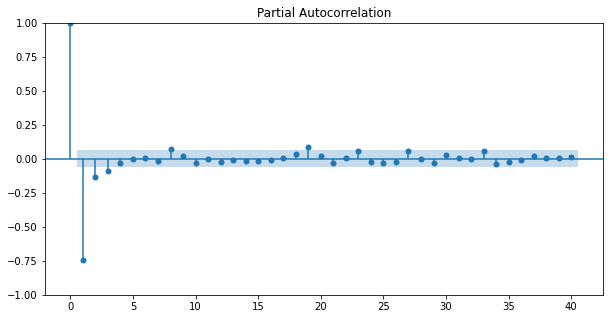

In [53]:
plt.subplot(2, 1, 1)
ar3 = np.array([1, 0.9, 0.3, 0.1])
ma = np.array([1])
AR_object = ArmaProcess(ar3, ma)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plot_acf(simulated_data_3, lags=40)
plt.show()
plot_pacf(simulated_data_3, lags=40, method="ywm")
plt.show()

MA(1)

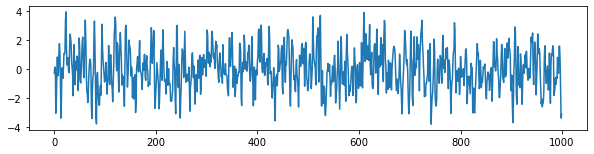

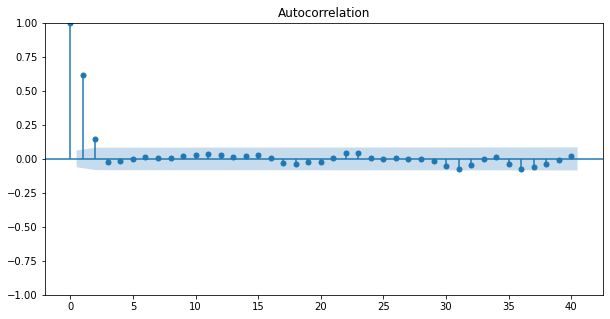

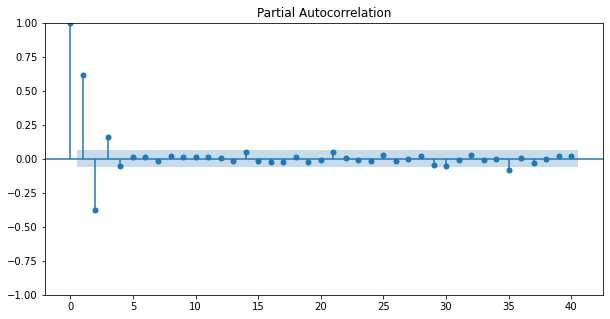

In [54]:
plt.rcParams['figure.figsize'] = (10, 5)
#MA(1)
plt.subplot(2, 1, 1)
ar = np.array([1])
ma1 = np.array([1, 0.9])
MA_object = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plot_acf(simulated_data_1, lags=40)
plt.show()
plot_pacf(simulated_data_1, lags=40, method="ywm")
plt.show()

MA(2)

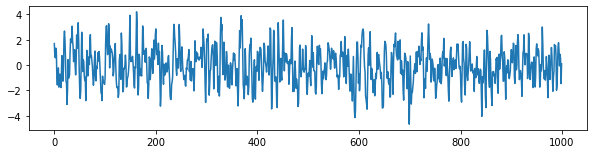

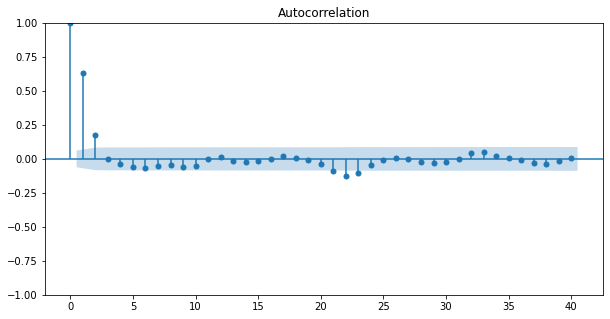

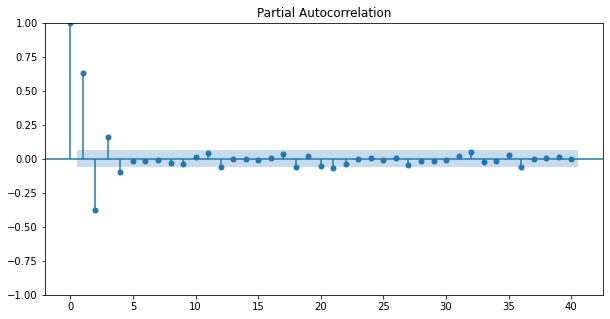

In [55]:
#MA(2)
plt.subplot(2, 1, 1)
ar = np.array([1])
ma2 = np.array([1, 0.9, 0.3])
MA_object = ArmaProcess(ar, ma2)
simulated_data_1 = MA_object.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plot_acf(simulated_data_1, lags=40)
plt.show()
plot_pacf(simulated_data_1, lags=40, method="ywm")
plt.show()

MA(3)

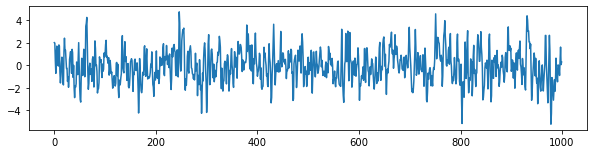

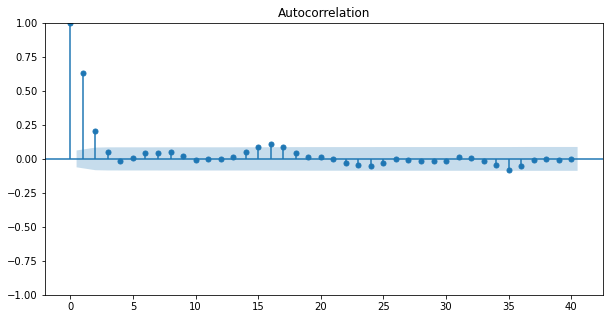

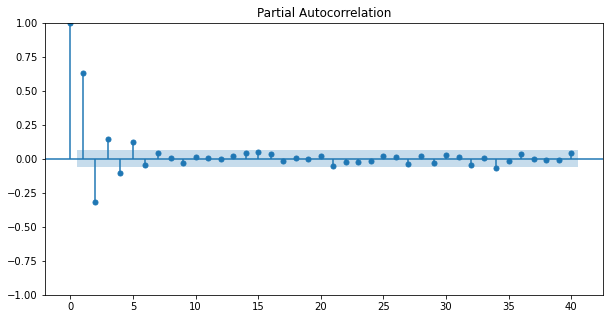

In [56]:
plt.subplot(2, 1, 1)
ar = np.array([1])
ma3 = np.array([1, 0.9, 0.3, 0.1])
MA_object = ArmaProcess(ar, ma3)
simulated_data_1 = MA_object.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plot_acf(simulated_data_1, lags=40)
plt.show()
plot_pacf(simulated_data_1, lags=40, method="ywm")
plt.show()